# Illustrated Sequential Proportional Approval Voting

In [131]:
%matplotlib inline
import pandas

# Code and setup.

ballots = pandas.read_json('fixtures/score_ballots.json')
seats = 3
seated = []
max_satisfaction = ballots.values.max()
round_number = 1



def plot_round_count(ballots):
    ballots.transpose().plot(kind='bar', stacked=True, edgecolor='white', linewidth=1, 
                     xlabel='Candidate', ylabel='Votes', title=f'Round {round_number} Count')
    return None


def reweight(ballot: pandas.DataFrame) -> pandas.DataFrame:
    satisfaction = ballot[ballot.index.isin(seated)].sum()
    weight = 1/(1+satisfaction/max_satisfaction)
    return ballot.apply(lambda x: weight*x)


def count(ballots):
    return ballots.sum().drop(seated, errors='ignore').sort_values(ascending=False)


def nextRound(ballots):
    global round_number
    round_number = round_number + 1
    reweighted = ballots.apply(reweight, axis=1)
    round_count = count(reweighted)
    seated.append(round_count.idxmax())
    return reweighted, round_count


# Round 1

In round one we only need to count the candidate with the highest votes and then seat that them. In this case it's Blue.

   Blueberry  Tomato  Squash  Strawberry
0        5.0     0.0     3.0         5.0
1        5.0     0.0     0.0         4.0
2        0.0     5.0     0.0         1.0
3        1.0     2.0     4.0         3.0
4        1.0     0.0     2.0         0.0
5        1.0     3.0     0.0         1.0
6        0.0     0.0     5.0         0.0
7        5.0     0.0     0.0         5.0
Strawberry    19.0
Blueberry     18.0
Squash        14.0
Tomato        10.0
dtype: float64
Seated: ['Strawberry']


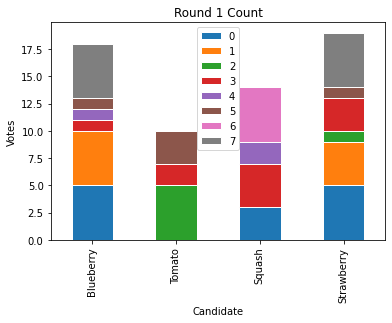

In [132]:
figure = plot_round_count(ballots.drop(seated, axis=1))
ballots, round_count = nextRound(ballots)
print(ballots)
print(round_count)
print(f"Seated: {seated }")


# Round 2

In round two we reweight the ballots. Ballot 1 was previously Blue 5, Yellow 3, and Red 5. Now that Blue is seated, this voter's ballot has 5 points of satisfaction. Because of their statisfaction, their votes for other candidates is reduced by $\frac{1}{(1+\frac{Satisfaction}{Max Satisfaction})}$ = $\frac{1}{(1+\frac{5}{5})}$ = $\frac{1}{2}$. Their votes for Yellow are now worth 1.5 and Red 2.5.

   Blueberry    Tomato  Squash  Strawberry
0   2.500000  0.000000     1.5    2.500000
1   2.777778  0.000000     0.0    2.222222
2   0.000000  4.166667     0.0    0.833333
3   0.625000  1.250000     2.5    1.875000
4   1.000000  0.000000     2.0    0.000000
5   0.833333  2.500000     0.0    0.833333
6   0.000000  0.000000     5.0    0.000000
7   2.500000  0.000000     0.0    2.500000
Squash       11.000000
Blueberry    10.236111
Tomato        7.916667
dtype: float64
Seated: ['Strawberry', 'Squash']


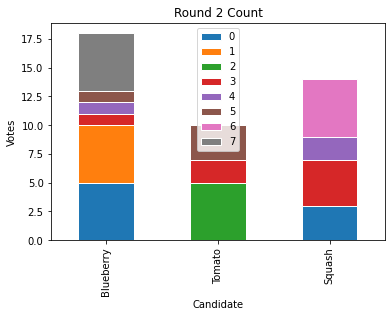

In [133]:
figure = plot_round_count(ballots.drop(seated, axis=1))
ballots, round_count = nextRound(ballots)
print(ballots)
print(round_count)
print(f"Seated: {seated }")


Because a lot of votes for Red were correlated with vote for Blue, Red, despite being in 2nd place in Round 1, doesn't have the highest score in Round 2. Yellow has the highest score of 11, and is seated.

# Round 3

In round 3 Green catches up but isn't able to overcome Red's lead.

Blueberry    6.740537
Tomato       6.380952
dtype: float64
Seated: ['Strawberry', 'Squash', 'Blueberry']


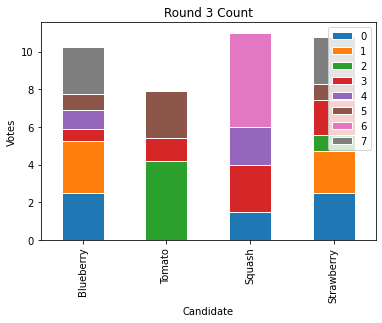

In [134]:
plot_round_count(ballots)
ballots, round_count = nextRound(ballots)
print(round_count)
print(f"Seated: {seated }")
